## Declaraciones


In [156]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
from matplotlib import pyplot as plt
from statistics import mean, mode
from datetime import datetime
from copy import deepcopy


class KNNClassifier:
    def __init__(self, k=5):
        self.k = k
        self.models = {
            "Algoritmos Bioinspirados": KNeighborsRegressor(n_neighbors=self.k),
            "Procesamiento de Señales": KNeighborsRegressor(n_neighbors=self.k),
            "Teoría de la Computación": KNeighborsRegressor(n_neighbors=self.k),
            "Tecnologías del Lenguaje Natural": KNeighborsRegressor(n_neighbors=self.k),
            "Aprendizaje de Máquina": KNeighborsRegressor(n_neighbors=self.k),
            "Visión Artificial": KNeighborsRegressor(n_neighbors=self.k),
        }
        self.scaler = StandardScaler()

    def preprocess(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        X_train, X_test = self.scale(X_train, X_test)
        return X_train, X_test, y_train, y_test

    def scale(self, X_train, X_test):
        # Assuming df is a DataFrame with numerical features

        X_train = pd.DataFrame(
            self.scaler.fit_transform(X_train), columns=X_train.columns
        )
        X_test = pd.DataFrame(self.scaler.fit_transform(X_test), columns=X_test.columns)
        return X_train, X_test

    def fit(self, model, X, y):

        self.models[model].fit(X, y)

    def predict(self, model, X):
        return self.models[model].predict(X)

In [117]:
df = pd.read_excel("Respuestas.xlsx")
df

,ID,Hora de inicio,Hora de finalización,Correo electrónico,Nombre,Hora de la última modificación,Indica tu género,Indica tu edad,¿Cuánto tiempo te toma el trayecto de ida y vuelta entre tu casa y la universidad?,¿Tienes otras responsabilidades además de estudiar y/o trabajar?,...,"¿Consideras que cuentas con una organización de tiempos para el estudio adecuada? (Por ejemplo, dividir tus temas por asignatura y dificultad de acuerdo al tiempo con el que cuentas).",¿Cómo calificarías tu nivel de organización académica?,¿Consideras que gestionas bien tu tiempo de estudio?,¿Qué tan frecuentemente postergas actividades académicas?,¿Sueles cumplir con los tiempos de entrega de tus tareas?,Ordena las materias de 5to Semestre por dificultad y dedicación que necesites,¿Qué problema principalmente enfrentas al momento de planificar tus tiempos de estudio?,¿Qué herramientas usas para organizarte?,¿Qué funcionalidades consideras más útiles para una agenda de estudio con IA?\n,¿Qué esperas al utilizar una aplicación para brindarte apoyo en tu organización académica?
0,1,2025-05-14 09:34:58,2025-05-14 09:37:16,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,No :(,Medio,A veces,Ocasionalmente,Siempre,Procesamiento de Señales;Teoría de la Computac...,Me distraigo fácilmente,"No uso ninguna, con mi memoria me basta 🥱;",Seguimiento de tareas y entregas;,Aprovechar mi tiempo de buena manera
1,2,2025-05-14 09:38:41,2025-05-14 09:42:08,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Si :),Medio,Si,Ocasionalmente,A veces,Teoría de la Computación;Procesamiento de Seña...,Me cuesta priorizar las actividades y tareas,Notion / Trello;,Seguimiento de tareas y entregas;Ajustes dinám...,Aprovechar mi tiempo de buena manera
2,3,2025-05-14 09:40:23,2025-05-14 09:43:29,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"No, solo estudio o trabajo",...,No :(,Medio,No,Frecuentemente,Siempre,Procesamiento de Señales;Algoritmos Bioinspira...,Me distraigo fácilmente,Microsoft To Do;,Seguimiento de tareas y entregas;Recordatorios...,Aprovechar mi tiempo de buena manera
3,4,2025-05-14 09:44:29,2025-05-14 09:51:39,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, cuido a alguien (hijos, hermanos, adultos ...",...,No :(,Medio,A veces,Frecuentemente,A veces,Procesamiento de Señales;Teoría de la Computac...,Me distraigo fácilmente,"Notion / Trello;No uso ninguna, con mi memoria...",Recomendaciones automáticas de estudio según d...,Tener mis tareas mejor ordenadas
4,5,2025-05-14 09:58:19,2025-05-14 09:59:14,anonymous,NaN,NaN,Masculino,21-23,De 1 a 2 horas,"Sí, tengo otras actividades (deporte, voluntar...",...,No :(,Alto,Si,Siempre,Siempre,Procesamiento de Señales;Teoría de la Computac...,Me distraigo fácilmente,"No uso ninguna, con mi memoria me basta 🥱;Agen...",Recomendaciones automáticas de estudio según d...,Aprovechar mi tiempo de buena manera
5,6,2025-05-14 10:02:09,2025-05-14 10:05:05,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Si :),Medio,A veces,Frecuentemente,Siempre,Procesamiento de Señales;Teoría de la Computac...,Me distraigo fácilmente,"No uso ninguna, con mi memoria me basta 🥱;",Seguimiento de tareas y entregas;Sugerencias s...,No olvidarme de mis pendientes
6,7,2025-05-14 10:06:39,2025-05-14 10:10:00,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,No :(,Bajo,No,Siempre,Siempre,Teoría de la Computación;Tecnologías del Lengu...,Me cuesta priorizar las actividades y tareas,"No uso ninguna, con mi memoria me basta 🥱;",Recomendaciones automáticas de estudio según d...,Tener mis tareas mejor ordenadas
7,8,2025-05-14 11:34:58,2025-05-14 11:40:54,anonymous,NaN,NaN,Masculino,21-23,Menos de 30 min,"Sí, tengo otras actividades (deporte, voluntar...",...,No :(,Medio,No,Frecuentemente,A veces,Procesamiento de Señales;Aprendizaje de Máquin...,Me cuesta prio

### Frecuencias


In [118]:
def materias_frecuencias(x):
    l = {
        "Algoritmos Bioinspirados": 0,
        "Procesamiento de Señales": 0,
        "Teoría de la Computación": 0,
        "Tecnologías del Lenguaje Natural": 0,
        "Aprendizaje de Máquina": 0,
        "Visión Artificial": 0,
    }
    for i in range(len(x)):
        lst = x[i].split(";")
        for key in l.keys():
            for j in range(len(lst)):
                if key == lst[j]:
                    l[key] += (6 - j) ** 0.8
    return l

In [119]:
def frecuencia_individual(x, i, frecuencias, l):
    lst = x[i].split(";")
    for key in frecuencias.keys():
        for j in range(len(lst)):
            if key == lst[j]:
                l[key] = (6 - j) ** 0.8 * frecuencias[key]
    suma = sum(list(l.values()))
    for key in frecuencias.keys():
        l[key] = l[key] / suma
    return l

In [120]:
def calc_horas(hora):
    horas = hora.split("–")
    if len(horas) != 2:
        horas = hora.split("-")
    hora1 = horas[0].split(":")
    hora2 = horas[1].split(":")
    return (int(hora1[0]) + int(hora2[0])) / 2

In [121]:
def tiempo_al_dia(hora):
    if hora == "Menos de 30 min o simplemente no estudio":
        return 0.25
    elif hora == "30 min - 1 hora":
        return 0.75
    elif hora == "1hr - 2hrs":
        return 1.5
    else:
        return 2.5

In [122]:
def nuevo_df(df, frecuencias):
    n_df = pd.DataFrame(
        {
            "Algoritmos Bioinspirados": [],
            "Procesamiento de Señales": [],
            "Teoría de la Computación": [],
            "Tecnologías del Lenguaje Natural": [],
            "Aprendizaje de Máquina": [],
            "Visión Artificial": [],
            "Lunes": [],
            "Martes": [],
            "Miércoles": [],
            "Jueves": [],
            "Viernes": [],
            "Tiempo al día": [],
        }
    )
    for i in range(len(df)):
        l = {
            "Algoritmos Bioinspirados": 0,
            "Procesamiento de Señales": 0,
            "Teoría de la Computación": 0,
            "Tecnologías del Lenguaje Natural": 0,
            "Aprendizaje de Máquina": 0,
            "Visión Artificial": 0,
        }
        l = frecuencia_individual(
            df[
                "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
            ].values,
            i,
            frecuencias,
            l,
        )
        registro = list(l.values())
        registro = registro + [
            calc_horas(df["Lunes"].values[i]),
            calc_horas(df["Martes"].values[i]),
            calc_horas(df["Miércoles"].values[i]),
            calc_horas(df["Jueves"].values[i]),
            calc_horas(df["Viernes"].values[i]),
            tiempo_al_dia(
                df[
                    "¿Cuánto tiempo al día dedicas a estudiar fuera del horario escolar?"
                ].values[i]
            ),
        ]

        n_df.loc[i] = registro

    return n_df

In [123]:
frecuencias = materias_frecuencias(
    df[
        "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
    ].values
)
frecuencias

{'Algoritmos Bioinspirados': 158.30509038677886,
 'Procesamiento de Señales': 181.63542828405102,
 'Teoría de la Computación': 187.44200393779812,
 'Tecnologías del Lenguaje Natural': 120.82861667752901,
 'Aprendizaje de Máquina': 139.0160528150361,
 'Visión Artificial': 124.63714652577322}

In [124]:
suma = sum(list(frecuencias.values()))
suma

911.8643386269663

In [125]:
for key in frecuencias.keys():
    frecuencias[key] = frecuencias[key] / suma
frecuencias

{'Algoritmos Bioinspirados': 0.17360596711693507,
 'Procesamiento de Señales': 0.19919128382358647,
 'Teoría de la Computación': 0.2055590903138483,
 'Tecnologías del Lenguaje Natural': 0.13250722893656078,
 'Aprendizaje de Máquina': 0.15245256002045063,
 'Visión Artificial': 0.13668386978861877}

In [150]:
n_df = nuevo_df(df, frecuencias)
n_df

,Algoritmos Bioinspirados,Procesamiento de Señales,Teoría de la Computación,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,Visión Artificial,Lunes,Martes,Miércoles,Jueves,Viernes,Tiempo al día
0,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,17.5,17.5,17.5,17.5,17.5,1.50
1,0.062986,0.261896,0.312708,0.115776,0.096303,0.150331,8.5,8.5,8.5,8.5,8.5,1.50
2,0.233953,0.310585,0.076441,0.118666,0.171859,0.088497,14.5,11.5,14.5,14.5,11.5,0.75
3,0.062607,0.301194,0.268638,0.115078,0.166662,0.085821,17.5,17.5,17.5,17.5,17.5,2.50
4,0.185247,0.293988,0.262211,0.081209,0.129232,0.048112,20.5,20.5,20.5,20.5,20.5,1.50
5,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,20.5,20.5,20.5,20.5,20.5,0.25
6,0.191360,0.174424,0.313398,0.174604,0.096515,0.049700,8.5,8.5,8.5,8.5,8.5,0.75
7,0.065447,0.314857,0.134922,0.120298,0.208273,0.156202,8.5,8.5,8.5,8.5,8.5,0.75
8,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,8.5,8.5,8.5,8.5,8.5,1.50
9,0.149544,0.298743,0.266452,0.082522,0.054531,0.148208,20.5,20.5,20.5,20.5,20.5,0.75


In [151]:
n_df["Semana"] = n_df.apply(
    lambda x: mode(
        [
            x["Lunes"],
            x["Martes"],
            x["Miércoles"],
            x["Jueves"],
            x["Viernes"],
        ]
    ),
    axis=1,
)
n_df.drop(columns=["Lunes", "Martes", "Miércoles", "Jueves", "Viernes"], inplace=True)
n_df

,Algoritmos Bioinspirados,Procesamiento de Señales,Teoría de la Computación,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,Visión Artificial,Tiempo al día,Semana
0,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,1.50,17.5
1,0.062986,0.261896,0.312708,0.115776,0.096303,0.150331,1.50,8.5
2,0.233953,0.310585,0.076441,0.118666,0.171859,0.088497,0.75,14.5
3,0.062607,0.301194,0.268638,0.115078,0.166662,0.085821,2.50,17.5
4,0.185247,0.293988,0.262211,0.081209,0.129232,0.048112,1.50,20.5
5,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,0.25,20.5
6,0.191360,0.174424,0.313398,0.174604,0.096515,0.049700,0.75,8.5
7,0.065447,0.314857,0.134922,0.120298,0.208273,0.156202,0.75,8.5
8,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,1.50,8.5
9,0.149544,0.298743,0.266452,0.082522,0.054531,0.148208,0.75,20.5


In [128]:
tiempo_efectivo = {
    "8.5": n_df[n_df["Semana"] == 8.5]["Tiempo al día"].mean(),
    "11.5": n_df[n_df["Semana"] == 11.5]["Tiempo al día"].mean(),
    "14.5": n_df[n_df["Semana"] == 14.5]["Tiempo al día"].mean(),
    "17.5": n_df[n_df["Semana"] == 17.5]["Tiempo al día"].mean(),
    "20.5": n_df[n_df["Semana"] == 20.5]["Tiempo al día"].mean(),
}

tiempo_efectivo

{'8.5': np.float64(1.1875),
 '11.5': np.float64(0.95),
 '14.5': np.float64(1.3333333333333333),
 '17.5': np.float64(1.2916666666666667),
 '20.5': np.float64(1.1160714285714286)}

In [129]:
for key in tiempo_efectivo.keys():
    tiempo_efectivo[key] = (tiempo_efectivo[key] / max(tiempo_efectivo.values())) * 0.9
tiempo_efectivo

{'8.5': np.float64(0.8015625000000001),
 '11.5': np.float64(0.64125),
 '14.5': np.float64(0.9),
 '17.5': np.float64(0.9),
 '20.5': np.float64(0.9)}

In [130]:
tiempo_efectivo

{'8.5': np.float64(0.8015625000000001),
 '11.5': np.float64(0.64125),
 '14.5': np.float64(0.9),
 '17.5': np.float64(0.9),
 '20.5': np.float64(0.9)}

In [ ]:
def etiquetar(df, tiempo_efectivo):
    n_df = deepcopy(df)

    n_df["Et_Algoritmos Bioinspirados"] = df.apply(
        lambda row: tiempo_efectivo[str(row["Semana"])]
        * row["Algoritmos Bioinspirados"],
        axis=1,
    )


    n_df["Et_Procesamiento de Señales"] = df.apply(

        lambda row: tiempo_efectivo.get(str(row["Semana"]), 0)
        * row["Procesamiento de Señales"],
        axis=1,
    )


    n_df["Et_Teoría de la Computación"] = df.apply(

        lambda row: tiempo_efectivo.get(str(row["Semana"]), 0)
        * row["Teoría de la Computación"],
        axis=1,
    )


    n_df["Et_Tecnologías del Lenguaje Natural"] = df.apply(
        lambda row: tiempo_efectivo.get(str(row["Semana"]), 0)
        * row["Tecnologías del Lenguaje Natural"],
        axis=1,
    )


    n_df["Et_Aprendizaje de Máquina"] = df.apply(
        lambda row: tiempo_efectivo.get(str(row["Semana"]), 0)
        * row["Aprendizaje de Máquina"],
        axis=1,
    )


    n_df["Et_Visión Artificial"] = df.apply(

        lambda row: tiempo_efectivo.get(str(row["Semana"]), 0)
        * row["Visión Artificial"],
        axis=1,
    )


    return n_df

In [157]:
df_et = etiquetar(n_df, tiempo_efectivo)
df_et

,Algoritmos Bioinspirados,Procesamiento de Señales,Teoría de la Computación,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,Visión Artificial,Tiempo al día,Semana,Et_Algoritmos Bioinspirados,Et_Procesamiento de Señales,Et_Teoría de la Computación,Et_Tecnologías del Lenguaje Natural,Et_Aprendizaje de Máquina,Et_Visión Artificial
0,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,1.50,17.5,0.133882,0.267455,0.238546,0.042432,0.085000,0.132686
1,0.062986,0.261896,0.312708,0.115776,0.096303,0.150331,1.50,8.5,0.050488,0.209926,0.250655,0.092802,0.077193,0.120499
2,0.233953,0.310585,0.076441,0.118666,0.171859,0.088497,0.75,14.5,0.210558,0.279526,0.068797,0.106799,0.154673,0.079648
3,0.062607,0.301194,0.268638,0.115078,0.166662,0.085821,2.50,17.5,0.056346,0.271074,0.241774,0.103570,0.149996,0.077239
4,0.185247,0.293988,0.262211,0.081209,0.129232,0.048112,1.50,20.5,0.166722,0.264590,0.235990,0.073088,0.116309,0.043301
5,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,0.25,20.5,0.133882,0.267455,0.238546,0.042432,0.085000,0.132686
6,0.191360,0.174424,0.313398,0.174604,0.096515,0.049700,0.75,8.5,0.153387,0.139811,0.251208,0.139956,0.077363,0.039838
7,0.065447,0.314857,0.134922,0.120298,0.208273,0.156202,0.75,8.5,0.052460,0.252378,0.108149,0.096427,0.166944,0.125206
8,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,1.50,8.5,0.119238,0.238202,0.212455,0.037791,0.075703,0.118173
9,0.149544,0.298743,0.266452,0.082522,0.054531,0.148208,0.75,20.5,0.134589,0.268869,0.239807,0.074270,0.049078,0.133387


### Tareas


In [228]:
import json


def leer_json(ruta: str):
    with open(ruta, "r", encoding="utf-8") as archivo:
        datos = json.load(archivo)
    return datos

In [229]:
json_tareas = leer_json("tareas.json")

In [225]:
def asignar_tareas(json: dict, tiempo_semanal: float, frecuencias: dict):
    from datetime import datetime
    from statistics import mean

    tareas_por_materia = {}
    tareas_por_actividad = {}

    # Mapeo de números de día a nombres en español
    dias_semana = {
        0: "lunes",
        1: "martes",
        2: "miércoles",
        3: "jueves",
        4: "viernes",
        5: "sábado",
        6: "domingo",
    }

    # Inicializar tareas por materia y por actividad
    for materia in json["tareas"].keys():
        tareas_por_materia[materia] = 0
        for tarea in json["tareas"][materia]:
            tareas_por_materia[materia] += tarea["tiempoDuracion"] / 60
            descripcion = tarea["descripcion"]
            tiempo_horas = tarea["tiempoDuracion"] / 60
            # Convertir fecha a día de la semana
            fecha = datetime.strptime(tarea["fechaEntrega"], "%Y-%m-%d")
            dia_semana = dias_semana[fecha.weekday()]
            tareas_por_actividad[descripcion] = (tiempo_horas, dia_semana)

    tiempo_restante = tiempo_semanal
    tareas_procesadas = set()  # Para evitar procesar la misma tarea dos veces

    # Aplicar frecuencias
    for key in frecuencias.keys():
        # Si es una actividad específica
        if key in tareas_por_actividad and key not in tareas_procesadas:
            tiempo_original, dia_semana = tareas_por_actividad[key]
            tiempo_ajustado = (tiempo_original * frecuencias[key]) / mean(
                frecuencias.values()
            )
            tareas_por_actividad[key] = (tiempo_ajustado, dia_semana)
            tiempo_restante -= tiempo_ajustado
            tareas_procesadas.add(key)

            # Actualizar también en tareas_por_materia
            for materia in json["tareas"].keys():
                for tarea in json["tareas"][materia]:
                    if tarea["descripcion"] == key:
                        tareas_por_materia[materia] -= tiempo_original
                        tareas_por_materia[materia] += tiempo_ajustado
                        break

        # Si es una materia completa
        elif key in tareas_por_materia:
            tiempo_original_materia = tareas_por_materia[key]
            tiempo_ajustado_materia = (
                tiempo_original_materia * frecuencias[key]
            ) / mean(frecuencias.values())
            tareas_por_materia[key] = tiempo_ajustado_materia

            # Actualizar actividades de esta materia
            for tarea in json["tareas"][key]:
                descripcion = tarea["descripcion"]
                if descripcion not in tareas_procesadas:
                    tiempo_original_actividad, dia_semana = tareas_por_actividad[
                        descripcion
                    ]
                    tiempo_ajustado_actividad = (
                        tiempo_original_actividad * frecuencias[key]
                    ) / mean(frecuencias.values())
                    tareas_por_actividad[descripcion] = (
                        tiempo_ajustado_actividad,
                        dia_semana,
                    )
                    tiempo_restante -= tiempo_ajustado_actividad
                    tareas_procesadas.add(descripcion)

    # Restar el tiempo de las tareas que no fueron ajustadas por frecuencias
    for descripcion, (tiempo_horas, dia_semana) in tareas_por_actividad.items():
        if descripcion not in tareas_procesadas:
            tiempo_restante -= tiempo_horas

    return {
        "por_materia": tareas_por_materia,
        "por_actividad": tareas_por_actividad,
        "tiempo_restante": tiempo_restante,
    }

In [226]:
json = {
    "materias": {
        "Algoritmos bioinspirados": {"color": "#133a94"},
        "Aprendizaje Máquina": {"color": "#10b9a0"},
        "Natacion": {"color": "#888888"},
        "Procesamiento de señales": {"color": "#3bcfd4"},
        "Tecnologías de Lenguaje Natural": {"color": "#f59e0b"},
        "Teoría de la computación": {"color": "#ef4444"},
        "Visión Artificial": {"color": "#facc15"},
    },
    "clases": {
        "Lun": [
            {
                "horaInicio": "10:00",
                "horaFin": "11:00",
                "materia": "Teoría de la computación",
            },
            {
                "horaInicio": "11:00",
                "horaFin": "12:00",
                "materia": "Procesamiento de señales",
            },
        ],
        "Mar": [],
        "Mié": [],
        "Jue": [],
        "Vie": [],
    },
    "extras": {
        "Lun": [
            {"inicio": "07:44", "fin": "08:00", "actividad": "Desayuno"},
            {"inicio": "14:00", "fin": "15:00", "actividad": "Comida"},
            {"inicio": "08:45", "fin": "09:00", "actividad": "Trayecto Ida"},
            {"inicio": "16:00", "fin": "16:30", "actividad": "Trayecto Vuelta"},
            {"inicio": "23:00", "fin": "06:44", "actividad": "Dormirse"},
        ],
        "Mar": [
            {"inicio": "07:44", "fin": "08:00", "actividad": "Desayuno"},
            {"inicio": "14:00", "fin": "15:00", "actividad": "Comida"},
            {"inicio": "08:45", "fin": "09:00", "actividad": "Trayecto Ida"},
            {"inicio": "16:00", "fin": "16:30", "actividad": "Trayecto Vuelta"},
            {"inicio": "23:00", "fin": "06:44", "actividad": "Dormirse"},
        ],
        "Mié": [
            {"inicio": "07:44", "fin": "08:00", "actividad": "Desayuno"},
            {"inicio": "14:00", "fin": "15:00", "actividad": "Comida"},
            {"inicio": "08:45", "fin": "09:00", "actividad": "Trayecto Ida"},
            {"inicio": "16:00", "fin": "16:30", "actividad": "Trayecto Vuelta"},
            {"inicio": "23:00", "fin": "06:44", "actividad": "Dormirse"},
        ],
        "Jue": [
            {"inicio": "07:44", "fin": "08:00", "actividad": "Desayuno"},
            {"inicio": "14:00", "fin": "15:00", "actividad": "Comida"},
            {"inicio": "08:45", "fin": "09:00", "actividad": "Trayecto Ida"},
            {"inicio": "16:00", "fin": "16:30", "actividad": "Trayecto Vuelta"},
            {"inicio": "23:00", "fin": "06:44", "actividad": "Dormirse"},
        ],
        "Vie": [
            {"inicio": "07:44", "fin": "08:00", "actividad": "Desayuno"},
            {"inicio": "14:00", "fin": "15:00", "actividad": "Comida"},
            {"inicio": "08:45", "fin": "09:00", "actividad": "Trayecto Ida"},
            {"inicio": "16:00", "fin": "16:30", "actividad": "Trayecto Vuelta"},
            {"inicio": "23:00", "fin": "06:44", "actividad": "Dormirse"},
        ],
    },
}

In [137]:
def calc_dif_horas(inicio, fin):
    inicio_parts = inicio.split(":")
    fin_parts = fin.split(":")

    inicio_horas = int(inicio_parts[0]) + int(inicio_parts[1]) / 60
    fin_horas = int(fin_parts[0]) + int(fin_parts[1]) / 60

    diferencia = fin_horas - inicio_horas

    # Si la diferencia es negativa, significa que cruza medianoche (ej: 23:00 a 06:44)
    if diferencia < 0:
        diferencia += 24

    return diferencia

In [138]:
def obtener_tiempo_libre(json: dict):
    tiempo_libre_total = {}
    periodos_libres = {}
    momento_mas_libre = {}

    # Momentos del día a evaluar (en formato decimal)
    momentos_evaluar = [8.5, 11.5, 14.5, 17.5, 20.5]

    def decimal_a_hora(decimal):
        """Convierte hora decimal a formato HH:MM"""
        horas = int(decimal)
        minutos = int((decimal - horas) * 60)
        return f"{horas:02d}:{minutos:02d}"

    def hora_a_decimal(hora_str):
        """Convierte formato HH:MM a decimal"""
        partes = hora_str.split(":")
        return int(partes[0]) + int(partes[1]) / 60

    def calcular_tiempo_libre_momento(periodos, momento_decimal):
        """Calcula cuánto tiempo libre hay alrededor de un momento específico"""
        tiempo_total = 0
        momento_str = decimal_a_hora(momento_decimal)

        for inicio, fin in periodos:
            inicio_decimal = hora_a_decimal(inicio)
            fin_decimal = hora_a_decimal(fin)

            # Si el momento está dentro del período libre
            if inicio_decimal <= momento_decimal <= fin_decimal:
                # Sumar todo el período
                tiempo_total += fin_decimal - inicio_decimal
            # Si el período está cerca del momento (dentro de 2 horas)
            elif (
                abs(inicio_decimal - momento_decimal) <= 2
                or abs(fin_decimal - momento_decimal) <= 2
            ):
                # Sumar una fracción basada en la cercanía
                distancia_inicio = abs(inicio_decimal - momento_decimal)
                distancia_fin = abs(fin_decimal - momento_decimal)
                distancia_min = min(distancia_inicio, distancia_fin)

                if distancia_min <= 2:
                    # Dar más peso a períodos más cercanos
                    peso = (2 - distancia_min) / 2
                    tiempo_total += (fin_decimal - inicio_decimal) * peso

        return tiempo_total

    for dia in json["extras"].keys():
        # Recopilar todos los períodos ocupados del día
        ocupados = []

        # Agregar actividades extras (excepto "Dormirse" que manejamos especial)
        for actividad in json["extras"][dia]:
            if actividad["actividad"] != "Dormirse":
                ocupados.append((actividad["inicio"], actividad["fin"]))

        # Agregar clases si existen para este día
        if dia in json["clases"]:
            for clase in json["clases"][dia]:
                ocupados.append((clase["horaInicio"], clase["horaFin"]))

        # Ordenar por hora de inicio
        ocupados.sort(key=lambda x: x[0])

        # Encontrar períodos libres entre actividades
        libres = []
        tiempo_total = 0

        if ocupados:
            # Empezar desde el fin del desayuno en lugar de la hora de despertar
            primer_inicio = ocupados[0][0]  # Hora del desayuno

            # Períodos libres entre actividades (empezando desde después del desayuno)
            for i in range(len(ocupados) - 1):
                fin_actual = ocupados[i][1]
                inicio_siguiente = ocupados[i + 1][0]

                if fin_actual != inicio_siguiente:
                    tiempo_libre = calc_dif_horas(fin_actual, inicio_siguiente)
                    if tiempo_libre > 0:
                        libres.append((fin_actual, inicio_siguiente))
                        tiempo_total += tiempo_libre

            # Período libre al final del día (antes de dormir)
            hora_dormir = None
            for actividad in json["extras"][dia]:
                if actividad["actividad"] == "Dormirse":
                    hora_dormir = actividad["inicio"]
                    break

            if hora_dormir and ocupados[-1][1] != hora_dormir:
                tiempo_libre = calc_dif_horas(ocupados[-1][1], hora_dormir)
                if tiempo_libre > 0:
                    libres.append((ocupados[-1][1], hora_dormir))
                    tiempo_total += tiempo_libre

        # Calcular el momento más libre del día
        tiempo_por_momento = {}
        for momento in momentos_evaluar:
            tiempo_por_momento[momento] = calcular_tiempo_libre_momento(libres, momento)

        # Encontrar el momento con más tiempo libre
        momento_optimo = max(tiempo_por_momento, key=tiempo_por_momento.get)

        tiempo_libre_total[dia] = tiempo_total
        periodos_libres[dia] = libres
        momento_mas_libre[dia] = momento_optimo

    return {
        "tiempo_total_libre": tiempo_libre_total,
        "periodos_libres": periodos_libres,
        "momento_mas_libre": momento_mas_libre,
    }

In [139]:
tiempo_libre_por_dia = obtener_tiempo_libre(json)
tiempo_libre_por_dia

{'tiempo_total_libre': {'Lun': 11.25,
  'Mar': 13.25,
  'Mié': 13.25,
  'Jue': 13.25,
  'Vie': 13.25},
 'periodos_libres': {'Lun': [('08:00', '08:45'),
   ('09:00', '10:00'),
   ('12:00', '14:00'),
   ('15:00', '16:00'),
   ('16:30', '23:00')],
  'Mar': [('08:00', '08:45'),
   ('09:00', '14:00'),
   ('15:00', '16:00'),
   ('16:30', '23:00')],
  'Mié': [('08:00', '08:45'),
   ('09:00', '14:00'),
   ('15:00', '16:00'),
   ('16:30', '23:00')],
  'Jue': [('08:00', '08:45'),
   ('09:00', '14:00'),
   ('15:00', '16:00'),
   ('16:30', '23:00')],
  'Vie': [('08:00', '08:45'),
   ('09:00', '14:00'),
   ('15:00', '16:00'),
   ('16:30', '23:00')]},
 'momento_mas_libre': {'Lun': 17.5,
  'Mar': 17.5,
  'Mié': 17.5,
  'Jue': 17.5,
  'Vie': 17.5}}

In [231]:
tiempo_total = 0
for dia in tiempo_libre_por_dia["tiempo_total_libre"].keys():
    tiempo_total += tiempo_libre_por_dia["tiempo_total_libre"][dia]
tiempo_total

64.25

In [232]:
tareas = asignar_tareas(json_tareas, tiempo_total, frecuencias)
tareas

{'por_materia': {'Algoritmos Bioinspirados': 27.77695473870961,
  'Aprendizaje de Máquina': 18.29430720245407,
  'Procesamiento de Señales': 15.935302705886917,
  'Tecnologías del Lenguaje Natural': 0.0,
  'Teoría de la Computación': 0.0,
  'Visión Artificial': 0.0},
 'por_actividad': {'Proyecto de optimización': (27.77695473870961, 'domingo'),
  'Informe de resultados': (18.29430720245407, 'viernes'),
  'Análisis de señales': (15.935302705886917, 'miércoles')},
 'tiempo_restante': 2.2434353529494047}

### Pruebas Modelo


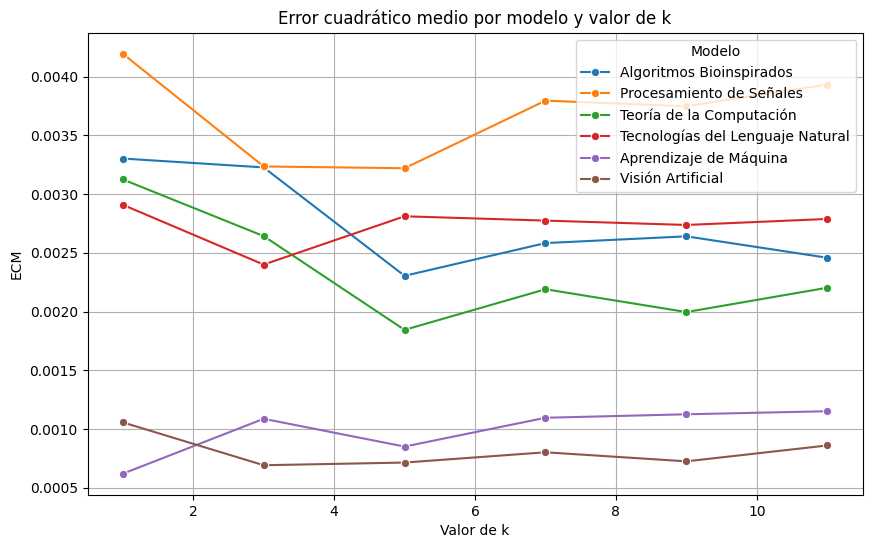

In [159]:
valores_k = [1, 3, 5, 7, 9, 11]
resultados = []
for k in valores_k:
    modelosKnn = KNNClassifier(k=k)
    X_train, X_test, y_train, y_test = modelosKnn.preprocess(n_df, df_et)
    for model in modelosKnn.models.keys():
        modelosKnn.fit(model, X_train, y_train["Et_" + model])
        pred = modelosKnn.predict(model, X_test)
        mse = mean_squared_error(y_test["Et_" + model], pred)
        resultados.append({"Modelo": model, "k": k, "ECM": mse})

df_resultados = pd.DataFrame(resultados)

# Mostramos la gráfica
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_resultados, x="k", y="ECM", hue="Modelo", marker="o")
plt.title("Error cuadrático medio por modelo y valor de k")
plt.xlabel("Valor de k")
plt.ylabel("ECM")
plt.grid(True)

In [191]:
modelosKnn = KNNClassifier(k=5)

X_train, X_test, y_train, y_test = modelosKnn.preprocess(n_df, df_et)
predicciones = {}
for model in modelosKnn.models.keys():
    modelosKnn.fit(model, X_train, y_train["Et_" + model])
    predicciones[model] = modelosKnn.predict(model, X_test)
    print(
        f"Error cuadrático medio para {model}:",
        mean_squared_error(y_test["Et_" + model], predicciones[model]),
    )

Error cuadrático medio para Algoritmos Bioinspirados: 0.0023045326338068865
Error cuadrático medio para Procesamiento de Señales: 0.003221180249752258
Error cuadrático medio para Teoría de la Computación: 0.0018440495776969829
Error cuadrático medio para Tecnologías del Lenguaje Natural: 0.002811710407909842
Error cuadrático medio para Aprendizaje de Máquina: 0.0008498246459235889
Error cuadrático medio para Visión Artificial: 0.0007136004494546007


In [169]:
X_test.shape

(12, 8)

In [206]:
def predecir_individuo(tiempo: float, materias: dict, dias: dict):
    semana = mode(dias.values())
    predicciones = {}
    X = np.array(list(materias.values()) + [tiempo] + [semana])
    columnas = list(materias.keys()) + [
        "Tiempo al día",
        "Semana",
    ]
    X_df = pd.DataFrame([X], columns=columnas)
    X_df = pd.DataFrame(modelosKnn.scaler.transform(X_df), columns=X_df.columns)
    for model in modelosKnn.models.keys():

        predicciones[model] = modelosKnn.predict(model, X_df)
    return predicciones

In [233]:
materias = predecir_individuo(
    tareas["tiempo_restante"] / 5,
    dict(pd.DataFrame(predicciones).iloc[0]),
    tiempo_libre_por_dia["momento_mas_libre"],
)
materias

{'Algoritmos Bioinspirados': array([0.17444784]),
 'Procesamiento de Señales': array([0.24558696]),
 'Teoría de la Computación': array([0.24552821]),
 'Tecnologías del Lenguaje Natural': array([0.06753256]),
 'Aprendizaje de Máquina': array([0.05606033]),
 'Visión Artificial': array([0.1108441])}

In [167]:
pd.DataFrame(predicciones), y_test[
    [
        "Et_Algoritmos Bioinspirados",
        "Et_Procesamiento de Señales",
        "Et_Teoría de la Computación",
        "Et_Tecnologías del Lenguaje Natural",
        "Et_Aprendizaje de Máquina",
        "Et_Visión Artificial",
    ]
]

(    Algoritmos Bioinspirados  Procesamiento de Señales  \
 0                   0.154649                  0.253222   
 1                   0.174106                  0.237880   
 2                   0.182671                  0.228293   
 3                   0.111571                  0.198626   
 4                   0.092900                  0.231822   
 5                   0.204334                  0.214128   
 6                   0.115026                  0.217416   
 7                   0.201925                  0.135210   
 8                   0.192395                  0.160034   
 9                   0.181532                  0.223278   
 10                  0.183637                  0.143608   
 11                  0.122562                  0.245510   
 
     Teoría de la Computación  Tecnologías del Lenguaje Natural  \
 0                   0.245680                          0.061319   
 1                   0.252439                          0.061176   
 2                   0.164675 

### Funcion Final


In [218]:
import numpy as np
from datetime import datetime, timedelta


def asignar_horarios_estudio(
    horas_materias: dict,
    periodos_libres: dict,
    tareas_actividad: dict,
    tiempo_total_libre: dict,
):
    horarios_materias = {}
    horarios_tareas = {}

    # Mapeo de días
    dias_semana_orden = ["Lun", "Mar", "Mié", "Jue", "Vie"]
    dias_completos = {
        "lunes": "Lun",
        "martes": "Mar",
        "miércoles": "Mié",
        "jueves": "Jue",
        "viernes": "Vie",
        "sábado": "Sab",
        "domingo": "Dom",
    }

    def hora_a_decimal(hora_str):
        partes = hora_str.split(":")
        return int(partes[0]) + int(partes[1]) / 60

    def decimal_a_hora(decimal):
        horas = int(decimal)
        minutos = int((decimal - horas) * 60)
        return f"{horas:02d}:{minutos:02d}"

    # PASO 1: Calcular tiempo total necesario
    tiempo_total_materias = sum(
        float(horas[0]) if isinstance(horas, np.ndarray) else float(horas)
        for horas in horas_materias.values()
    )
    tiempo_total_tareas = sum(tiempo for tiempo, _ in tareas_actividad.values())
    tiempo_necesario_total = tiempo_total_materias + tiempo_total_tareas

    # Calcular tiempo libre total disponible
    tiempo_libre_total_semana = sum(
        tiempo_total_libre.get(dia, 0) for dia in dias_semana_orden
    )

    # PASO 2: Reservar tiempo de descanso si es posible
    tiempo_descanso_disponible = max(
        0, tiempo_libre_total_semana - tiempo_necesario_total
    )
    tiempo_descanso_por_dia = {}

    if tiempo_descanso_disponible > 0:
        # Distribuir el descanso proporcionalmente entre los días según su tiempo libre
        for dia in dias_semana_orden:
            if tiempo_total_libre.get(dia, 0) > 0:
                proporcion = tiempo_total_libre[dia] / tiempo_libre_total_semana
                tiempo_descanso_por_dia[dia] = tiempo_descanso_disponible * proporcion
            else:
                tiempo_descanso_por_dia[dia] = 0

    # PASO 3: Crear períodos disponibles después de reservar descanso
    def reservar_descanso_en_periodo(periodos_dia, tiempo_descanso):
        """Reserva tiempo de descanso al final de los períodos del día"""
        if tiempo_descanso <= 0 or not periodos_dia:
            return periodos_dia.copy()

        periodos_restantes = periodos_dia.copy()
        tiempo_a_reservar = tiempo_descanso

        # Empezar desde el final de los períodos
        i = len(periodos_restantes) - 1
        while i >= 0 and tiempo_a_reservar > 0:
            inicio, fin = periodos_restantes[i]
            inicio_decimal = hora_a_decimal(inicio)
            fin_decimal = hora_a_decimal(fin)
            tiempo_periodo = fin_decimal - inicio_decimal

            if tiempo_a_reservar >= tiempo_periodo:
                # Reservar todo el período
                periodos_restantes.pop(i)
                tiempo_a_reservar -= tiempo_periodo
            else:
                # Reservar parte del período (desde el final)
                nuevo_fin = fin_decimal - tiempo_a_reservar
                periodos_restantes[i] = (inicio, decimal_a_hora(nuevo_fin))
                tiempo_a_reservar = 0

            i -= 1

        return periodos_restantes

    periodos_disponibles = {}
    for dia in dias_semana_orden:
        if dia in periodos_libres:
            # Reservar descanso antes de usar los períodos
            periodos_con_descanso = reservar_descanso_en_periodo(
                periodos_libres[dia], tiempo_descanso_por_dia.get(dia, 0)
            )
            periodos_disponibles[dia] = periodos_con_descanso
        else:
            periodos_disponibles[dia] = []

    def calcular_prioridad(tarea, tiempo_horas, dia_entrega):
        """Calcula la prioridad de una tarea basada en urgencia y duración"""
        dia_entrega_abrev = dias_completos[dia_entrega]

        # Determinar días disponibles para trabajar
        if dia_entrega_abrev in [
            "Sab",
            "Dom",
            "Lun",
        ]:  # Lunes tratado como fin de semana
            dias_disponibles = 5  # Toda la semana laboral
        elif dia_entrega_abrev in dias_semana_orden[1:]:  # Martes a Viernes
            indice_entrega = dias_semana_orden.index(dia_entrega_abrev)
            dias_disponibles = indice_entrega  # Hasta el día anterior
        else:
            dias_disponibles = 5

        # Si no tiene días disponibles, máxima prioridad
        if dias_disponibles == 0:
            return 1000

        # Factor de urgencia (menos días = más urgente)
        factor_urgencia = (6 - dias_disponibles) / 5  # 0.2 a 1.0

        # Factor de duración (más horas = más prioritario)
        factor_duracion = min(tiempo_horas / 10, 1.0)  # Normalizar a máximo 1.0

        # Combinar factores (urgencia tiene más peso)
        prioridad = (factor_urgencia * 0.7) + (factor_duracion * 0.3)

        return prioridad

    def asignar_tiempo_en_periodo(dia, tiempo_necesario, descripcion, es_tarea=True):
        """Asigna tiempo en los períodos disponibles de un día específico"""
        asignaciones = []
        tiempo_restante = tiempo_necesario

        i = 0
        while i < len(periodos_disponibles[dia]) and tiempo_restante > 0:
            inicio, fin = periodos_disponibles[dia][i]
            inicio_decimal = hora_a_decimal(inicio)
            fin_decimal = hora_a_decimal(fin)
            tiempo_periodo = fin_decimal - inicio_decimal

            if tiempo_periodo > 0:
                if tiempo_restante <= tiempo_periodo:
                    # El tiempo restante cabe en este período
                    fin_asignacion = inicio_decimal + tiempo_restante
                    asignaciones.append((inicio, decimal_a_hora(fin_asignacion)))

                    # Actualizar el período disponible
                    if fin_asignacion < fin_decimal:
                        periodos_disponibles[dia][i] = (
                            decimal_a_hora(fin_asignacion),
                            fin,
                        )
                    else:
                        periodos_disponibles[dia].pop(i)

                    tiempo_restante = 0
                else:
                    # Usar todo el período
                    asignaciones.append((inicio, fin))
                    tiempo_restante -= tiempo_periodo
                    periodos_disponibles[dia].pop(i)
                    continue
            else:
                i += 1
            i += 1

        return asignaciones, tiempo_restante

    # PASO 4: Priorizar y ordenar tareas
    tareas_priorizadas = []
    for tarea, (tiempo_horas, dia_entrega) in tareas_actividad.items():
        prioridad = calcular_prioridad(tarea, tiempo_horas, dia_entrega)
        tareas_priorizadas.append((prioridad, tarea, tiempo_horas, dia_entrega))

    # Ordenar por prioridad (mayor prioridad primero)
    tareas_priorizadas.sort(key=lambda x: x[0], reverse=True)

    # PASO 5: Asignar tareas según prioridad
    for prioridad, tarea, tiempo_horas, dia_entrega in tareas_priorizadas:
        # Determinar qué días están disponibles para esta tarea
        dia_entrega_abrev = dias_completos[dia_entrega]

        if dia_entrega_abrev in ["Sab", "Dom", "Lun"]:  # Lunes como próxima semana
            # Entrega en fin de semana o lunes próximo: puede usar toda la semana laboral
            dias_disponibles = dias_semana_orden.copy()
        elif dia_entrega_abrev in dias_semana_orden[1:]:  # Martes a Viernes
            # Entrega entre martes y viernes: usar hasta el día ANTERIOR
            indice_entrega = dias_semana_orden.index(dia_entrega_abrev)
            dias_disponibles = dias_semana_orden[:indice_entrega]
        else:
            dias_disponibles = dias_semana_orden.copy()

        horarios_tareas[tarea] = {}
        tiempo_restante = tiempo_horas

        # Intentar asignar en los días disponibles
        for dia in dias_disponibles:
            if tiempo_restante <= 0:
                break

            asignaciones, tiempo_restante = asignar_tiempo_en_periodo(
                dia, tiempo_restante, tarea, es_tarea=True
            )

            if asignaciones:
                horarios_tareas[tarea][dia] = asignaciones

        # Si no se pudo asignar todo el tiempo, reportar
        if tiempo_restante > 0:
            print(
                f"Advertencia: No se pudo asignar {tiempo_restante:.2f} horas para {tarea} (entrega {dia_entrega})"
            )

    # PASO 6: Asignar tiempo de estudio de materias
    for materia, horas_array in horas_materias.items():
        horas_semanales = (
            float(horas_array[0])
            if isinstance(horas_array, np.ndarray)
            else float(horas_array)
        )

        horarios_materias[materia] = {}
        tiempo_restante = horas_semanales

        # Distribuir el tiempo de manera equitativa entre los días
        for dia in dias_semana_orden:
            if tiempo_restante <= 0:
                break

            # Calcular cuánto tiempo asignar en este día (distribución equitativa)
            dias_restantes = len(
                [
                    d
                    for d in dias_semana_orden[dias_semana_orden.index(dia) :]
                    if len(periodos_disponibles[d]) > 0
                ]
            )

            if dias_restantes > 0:
                tiempo_para_hoy = min(tiempo_restante / dias_restantes, tiempo_restante)

                asignaciones, tiempo_no_asignado = asignar_tiempo_en_periodo(
                    dia, tiempo_para_hoy, materia, es_tarea=False
                )

                if asignaciones:
                    horarios_materias[materia][dia] = asignaciones

                tiempo_restante -= tiempo_para_hoy - tiempo_no_asignado

        # Si queda tiempo sin asignar, intentar distribuirlo en cualquier día disponible
        for dia in dias_semana_orden:
            if tiempo_restante <= 0:
                break

            asignaciones, tiempo_restante = asignar_tiempo_en_periodo(
                dia, tiempo_restante, materia, es_tarea=False
            )

            if asignaciones:
                if materia not in horarios_materias:
                    horarios_materias[materia] = {}
                if dia not in horarios_materias[materia]:
                    horarios_materias[materia][dia] = []
                horarios_materias[materia][dia].extend(asignaciones)

    return {
        "horarios_materias": horarios_materias,
        "horarios_tareas": horarios_tareas,
        "tiempo_descanso_reservado": tiempo_descanso_por_dia,
    }

In [234]:
asignar_horarios_estudio(
    materias,
    tiempo_libre_por_dia["periodos_libres"],
    tareas["por_actividad"],
    tiempo_libre_por_dia["tiempo_total_libre"],
)

{'horarios_materias': {'Algoritmos Bioinspirados': {'Vie': [('21:50',
     '22:00')]},
  'Procesamiento de Señales': {'Vie': [('22:00', '22:14')]},
  'Teoría de la Computación': {'Vie': [('22:14', '22:28')]},
  'Tecnologías del Lenguaje Natural': {'Vie': [('22:28', '22:32')]},
  'Aprendizaje de Máquina': {'Vie': [('22:32', '22:35')]},
  'Visión Artificial': {'Vie': [('22:35', '22:41')]}},
 'horarios_tareas': {'Análisis de señales': {'Lun': [('08:00', '08:45'),
    ('09:00', '10:00'),
    ('12:00', '14:00'),
    ('15:00', '16:00'),
    ('16:30', '22:45')],
   'Mar': [('08:00', '08:45'), ('09:00', '13:11')]},
  'Informe de resultados': {'Mar': [('13:11', '14:00'),
    ('15:00', '16:00'),
    ('16:30', '22:43')],
   'Mié': [('08:00', '08:45'),
    ('09:00', '14:00'),
    ('15:00', '16:00'),
    ('16:30', '20:00')]},
  'Proyecto de optimización': {'Mié': [('20:00', '22:43')],
   'Jue': [('08:00', '08:45'),
    ('09:00', '14:00'),
    ('15:00', '16:00'),
    ('16:30', '22:43')],
   'Vie': [

### API


In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import pandas as pd
import pickle

app = Flask(__name__)
CORS(app)

In [ ]:
@app.route("/predecir", methods=["POST"])
def predecir():
    data = request.get_json()
    modelo = data.get("modelo")
    features = data.get("features")

    if modelo not in modelosKnn.models:
        return jsonify({"error": "Modelo no válido"}), 400

    X = pd.DataFrame([features])
    X_scaled = pd.DataFrame(modelosKnn.scaler.transform(X), columns=X.columns)

    try:
        pred = modelosKnn.predict(modelo, X_scaled)
        return jsonify({"prediccion": pred.tolist()})
    except Exception as e:
        return jsonify({"error": str(e)}), 500


if __name__ == "__main__":
    app.run(debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


### Otros


In [ ]:
def materias(x, i):
    return x.split(";")[i]

In [ ]:
df["Materia1"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 0))
df["Materia2"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 1))
df["Materia3"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 2))
df["Materia4"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 3))
df["Materia5"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 4))
df["Materia6"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 5))

In [ ]:
df["Algoritmos Bioinspirados"] = df["Materia1"].apply(
    lambda x: frecuencias["Algoritmos Bioinspirados"]
)
df["Procesamiento de Señales"] = df["Materia1"].apply(
    lambda x: frecuencias["Procesamiento de Señales"]
)
df["Teoría de la Computación"] = df["Materia1"].apply(
    lambda x: frecuencias["Teoría de la Computación"]
)
df["Tecnologías del Lenguaje Natural"] = df["Materia1"].apply(
    lambda x: frecuencias["Tecnologías del Lenguaje Natural"]
)
df["Aprendizaje de Máquina"] = df["Materia1"].apply(
    lambda x: frecuencias["Aprendizaje de Máquina"]
)
df["Visión Artificial"] = df["Materia1"].apply(
    lambda x: frecuencias["Visión Artificial"]
)

In [ ]:
df

,ID,Hora de inicio,Hora de finalización,Correo electrónico,Nombre,Hora de la última modificación,Indica tu género,Indica tu edad,¿Cuánto tiempo te toma el trayecto de ida y vuelta entre tu casa y la universidad?,¿Tienes otras responsabilidades además de estudiar y/o trabajar?,...,Materia3,Materia4,Materia5,Materia6,Algoritmos Bioinspirados,Procesamiento de Señales,Teoría de la Computación,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,Visión Artificial
0,1,2025-05-14 09:34:58,2025-05-14 09:37:16,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Algoritmos Bioinspirados,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
1,2,2025-05-14 09:38:41,2025-05-14 09:42:08,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,Algoritmos Bioinspirados,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
2,3,2025-05-14 09:40:23,2025-05-14 09:43:29,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"No, solo estudio o trabajo",...,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,Visión Artificial,Teoría de la Computación,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
3,4,2025-05-14 09:44:29,2025-05-14 09:51:39,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, cuido a alguien (hijos, hermanos, adultos ...",...,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,Visión Artificial,Algoritmos Bioinspirados,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
4,5,2025-05-14 09:58:19,2025-05-14 09:59:14,anonymous,NaN,NaN,Masculino,21-23,De 1 a 2 horas,"Sí, tengo otras actividades (deporte, voluntar...",...,Algoritmos Bioinspirados,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,Visión Artificial,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
5,6,2025-05-14 10:02:09,2025-05-14 10:05:05,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Algoritmos Bioinspirados,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
6,7,2025-05-14 10:06:39,2025-05-14 10:10:00,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Algoritmos Bioinspirados,Procesamiento de Señales,Aprendizaje de Máquina,Visión Artificial,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
7,8,2025-05-14 11:34:58,2025-05-14 11:40:54,anonymous,NaN,NaN,Masculino,21-23,Menos de 30 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Tecnologías del Lenguaje Natural,Teoría de la Computación,Algoritmos Bioinspirados,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
8,9,2025-05-14 11:55:41,2025-05-14 11:57:43,anonymous,NaN,NaN,Femenino,18-20,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Algoritmos Bioinspirados,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
9,10,2025-05-14 15:49:32,2025-05-14 15:52:34,anonymous,NaN,NaN,Femenino,21-23,De 1 a 2 horas,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Algoritmos Bioinspirados,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041


In [ ]:
def crear_nuevo_registro(df: pd.DataFrame, frecuencias: dict, valores: list):
    nuevo_registro = []
    for key in frecuencias.keys():
        nuevo_registro.append(frecuencias[key])
    nuevo_registro.extend(valores)
    df.loc[len(df)] = nuevo_registro
    return df